## Converse Product Launch Network Analysis
- proof of concept
- focus on Chuck II launch

In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tweepy
import json
from klout import *

In [2]:
chuck = pd.read_csv("chuckii_twitter.csv", encoding = "ISO-8859-1")
print(chuck.shape)
chuck.head()

(4852, 17)


,GUID,Date (EST),URL,Contents,Author,Name,Country,State/Region,City/Urban Area,Category,Emotion,Source,Klout Score,Gender,Posts,Followers,Following
0,625450197393506304,7/26/2015 19:38,http://twitter.com/AvriilR5/status/62545019739...,RT @rikerR5 Cannot wait to get a pair of these...,@AvriilR5,Kade,NaN,NaN,NaN,Purchase Intent,NaN,Twitter,36.0,M,3715,394,916
1,626396332106874880,7/29/2015 10:18,http://twitter.com/Nikkintense_/status/6263963...,Converse Chuck II #discount,@Nikkintense_,Nikki,Netherlands,NaN,NaN,Value for money,NaN,Twitter,36.0,F,48684,338,520
2,625949463362695168,7/28/2015 4:42,http://twitter.com/Mertyyy_/status/62594946336...,"#ChuckII the fudge, i want the black and whit...",@Mertyyy_,Merliza Tolentino,Philippines,NaN,NaN,Purchase Intent,NaN,Twitter,29.0,NaN,2578,146,200
3,626754272772788224,7/30/2015 10:00,http://twitter.com/_MieuKun_/status/6267542727...,Tui ch? b?n holiday c?a converse Chuck II ra r...,@_MieuKun_,_Miêu Miêu_,Vietnam,NaN,NaN,Value for money,NaN,Twitter,23.0,NaN,8374,121,298
4,626067239456886784,7/28/2015 12:30,http://twitter.com/MandiSilva99/status/6260672...,Chuck II,@MandiSilva99,-,Brazil,Distrito Federal,Brasilia,Value for money,NaN,Twitter,36.0,NaN,8273,289,189


In [3]:
retweeted = []
for row in range(0, len(chuck)):
    retweeted.append("")
    if chuck['Contents'][row].split()[0] == "RT":
        retweeted[-1] = (chuck['Contents'][row].split()[1])

chuck['retweeted'] = retweeted

In [4]:
chuck.head()

,GUID,Date (EST),URL,Contents,Author,Name,Country,State/Region,City/Urban Area,Category,Emotion,Source,Klout Score,Gender,Posts,Followers,Following,retweeted
0,625450197393506304,7/26/2015 19:38,http://twitter.com/AvriilR5/status/62545019739...,RT @rikerR5 Cannot wait to get a pair of these...,@AvriilR5,Kade,NaN,NaN,NaN,Purchase Intent,NaN,Twitter,36.0,M,3715,394,916,@rikerR5
1,626396332106874880,7/29/2015 10:18,http://twitter.com/Nikkintense_/status/6263963...,Converse Chuck II #discount,@Nikkintense_,Nikki,Netherlands,NaN,NaN,Value for money,NaN,Twitter,36.0,F,48684,338,520,
2,625949463362695168,7/28/2015 4:42,http://twitter.com/Mertyyy_/status/62594946336...,"#ChuckII the fudge, i want the black and whit...",@Mertyyy_,Merliza Tolentino,Philippines,NaN,NaN,Purchase Intent,NaN,Twitter,29.0,NaN,2578,146,200,
3,626754272772788224,7/30/2015 10:00,http://twitter.com/_MieuKun_/status/6267542727...,Tui ch? b?n holiday c?a converse Chuck II ra r...,@_MieuKun_,_Miêu Miêu_,Vietnam,NaN,NaN,Value for money,NaN,Twitter,23.0,NaN,8374,121,298,
4,626067239456886784,7/28/2015 12:30,http://twitter.com/MandiSilva99/status/6260672...,Chuck II,@MandiSilva99,-,Brazil,Distrito Federal,Brasilia,Value for money,NaN,Twitter,36.0,NaN,8273,289,189,


In [5]:
# Most retweeted users
pd.crosstab(index=chuck["retweeted"], columns="count").sort_values(by = "count", axis=0, ascending = False).head(10)

col_0,count
retweeted,
,2708
@rikerR5,1292
@Kyle_JSimmons,180
@JackSWS,130
@SavedYouAClick,53
@ConverseID,48
@charmainedoble,43
@Converse,31
@PopiGames,24


In [6]:
adj_df = pd.crosstab(chuck.Author, chuck.retweeted)
idx = adj_df.columns.union(adj_df.index)
adj_df = adj_df.reindex(index = idx, columns = idx, fill_value = 0)
adj_df.shape

(4323, 4323)

### This is wrong!

I'm leaving this in just so that we know to look out for it next time, but we can see that the adjacency matrix below is wrong... it has a row and a column of tweets that were never retweeted by anyone, but configuring the matrix this way will make it appear that all tweets were retweeted by someone.

In [7]:
adj_df.head()

,,@00years,@0701Marianaa,@0mgstyls,@10Xmoisy,@1221lover_,@123Car1ssa,@143Macho_,@14kSarah,@15rcruz,...,@zacplateau,@zareehnuh,@zaynab2412,@zenzenla,@zixf171,@zoepingleyy,@zoeverborg,@zopfalzgraf,@zurisadaiam28,Kyle_JSimmons
,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
@00years,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
@0701Marianaa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
@0mgstyls,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
@10Xmoisy,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
adj_mat = np.matrix(adj_df)
adj_mat

matrix([[0, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

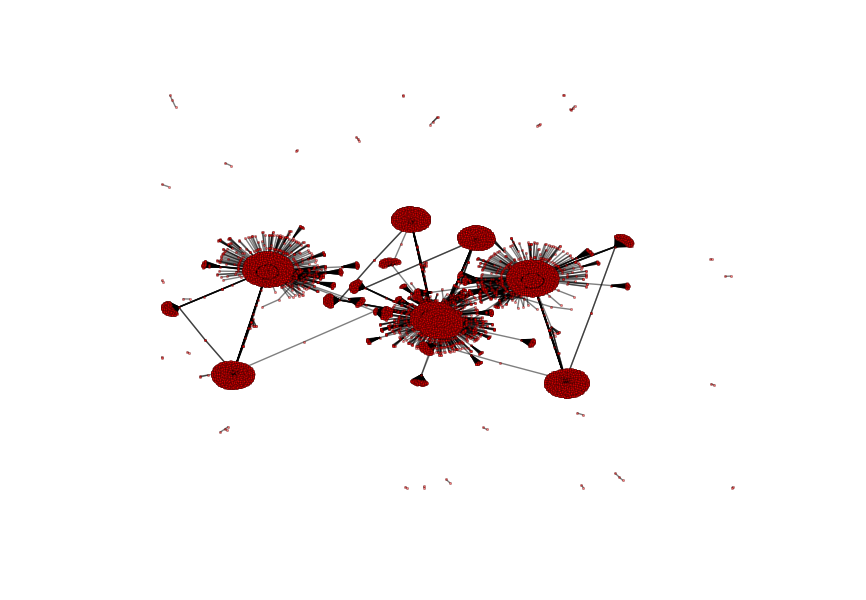

In [141]:
# we can see that lots of tweets are linked here even if they weren't retweets.
G = nx.from_numpy_matrix(adj_mat)
nx.draw(G, alpha=.5, node_size=3)
plt.show()
plt.savefig("misleading_graph.png", dpi=1000)

### This is right!

Below, I have removed the row and column of tweets that were never retweeted.  This is the right way to create the adjacency matrix.

In [9]:
# remove first column and row because these weren't retweeted
adj_df_rt = adj_df.iloc[1:len(adj_df), 1:len(adj_df)]
adj_df_rt.head()

,@00years,@0701Marianaa,@0mgstyls,@10Xmoisy,@1221lover_,@123Car1ssa,@143Macho_,@14kSarah,@15rcruz,@1731_victoria,...,@zacplateau,@zareehnuh,@zaynab2412,@zenzenla,@zixf171,@zoepingleyy,@zoeverborg,@zopfalzgraf,@zurisadaiam28,Kyle_JSimmons
@00years,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
@0701Marianaa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
@0mgstyls,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
@10Xmoisy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
@1221lover_,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# only retweeted
adj_mat_rt = np.matrix(adj_df_rt)
adj_mat_rt

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

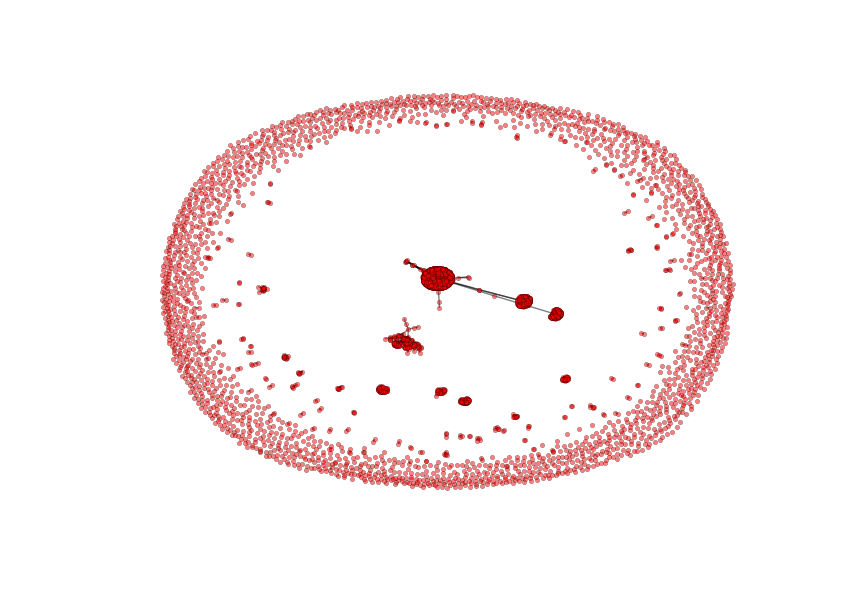

In [193]:
# only retweeted
G = nx.from_numpy_matrix(adj_mat_rt)
nx.draw(G, alpha=.5, node_size=10)
plt.show()
plt.savefig("graph.png", dpi=1000)

We can see that most tweets weren't retweeted.  In certain instances, some of the larger groups of retweets are linked by a small number of users.  Each node represents a tweet.  Larger clusters of nodes represent the same tweet that has been retweeted by many people.  It would be interesting to compare this graph with a similar graph from a different product launch.

---

## TWEEPY

Messing around with the tweepy library (interface to twitter api):

In [11]:
#import tweepy

consumer_key = '8kqqyPcjvb1P75OO9rtzYopnB'
consumer_secret = '7WaHHBVvjrvPJLLdP5a0e7pb2oHqt5C5trHrRfd1pp8pQpf3aE'

access_token ='262429770-QcqtCDv6GZ1PUDjSRMbO9117ociCqc0a2Y9Cg9CE'
access_token_secret = 'ZHUXvN1UP7NvmvSZHn8Zp6Ap0EKeqHZhXzL7XZ9B5Z0Pd'

auth = tweepy.AppAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)


In [68]:
# for tweet in api.search(q = "#chuckii #converse since:2015-07-23 until:2015-07-31", count = 5):
#    print(tweet.created_at, '\n',  tweet.text, '\n\n')

query = "#chuckii #converse"
max_tweets = 1

tweet = api.search(q = "@SheaSerrano", lang = "en", count = 20)
print(tweet[0].id)

followers = api.followers("@Converse")
print(followers[0].screen_name)

855193322683596803
CarolPatt704


In [71]:
tweet[1].text

"RT @SheaSerrano: i 100% forgot about the One 'Pac Tupac Red 'Pac Blue 'Pac children's book i was gonna do in 2015 lol https://t.co/R0l2eOm9…"

In [74]:
sample_tweet = tweet[1]

sample_tweet_json = json.dumps(sample_tweet._json)

def pp_json(json_thing, sort=True, indents=2):
    if type(json_thing) is str:
        print(json.dumps(json.loads(json_thing), sort_keys=sort, indent=indents))
    else:
        print(json.dumps(json_thing, sort_keys=sort, indent=indents))
    return None

pp_json(sample_tweet_json)

{
  "contributors": null,
  "coordinates": null,
  "created_at": "Thu Apr 20 22:55:47 +0000 2017",
  "entities": {
    "hashtags": [],
    "symbols": [],
    "urls": [],
    "user_mentions": [
      {
        "id": 57162282,
        "id_str": "57162282",
        "indices": [
          3,
          15
        ],
        "name": "Shea Serrano",
        "screen_name": "SheaSerrano"
      }
    ]
  },
  "favorite_count": 0,
  "favorited": false,
  "geo": null,
  "id": 855193307080781824,
  "id_str": "855193307080781824",
  "in_reply_to_screen_name": null,
  "in_reply_to_status_id": null,
  "in_reply_to_status_id_str": null,
  "in_reply_to_user_id": null,
  "in_reply_to_user_id_str": null,
  "is_quote_status": false,
  "lang": "en",
  "metadata": {
    "iso_language_code": "en",
    "result_type": "recent"
  },
  "place": null,
  "retweet_count": 152,
  "retweeted": false,
  "retweeted_status": {
    "contributors": null,
    "coordinates": null,
    "created_at": "Thu Apr 20 22:29:00 +0000

---

### Klout Setup

...testing Klout on myself:

In [12]:
k = Klout('vk235ehnfw2t88qv4s4kzdt8')

# Get kloutId of the user by inputting a twitter screenName
kloutID = k.identity.klout(screenName = "bhart214").get('id')

# Get klout score of the user
score = k.user.score(kloutId = kloutID, timeout = 10).get('score')
score

38.98050446738932

---

## Let's just look at users with high Klout Scores

In [13]:
chuck_high_klout = chuck[chuck["Klout Score"] > 65]
chuck_high_klout.head()

,GUID,Date (EST),URL,Contents,Author,Name,Country,State/Region,City/Urban Area,Category,Emotion,Source,Klout Score,Gender,Posts,Followers,Following,retweeted
77,625381874966237184,7/26/2015 15:07,http://twitter.com/SidewalkHustle/status/62538...,@KingRicharding Nice!! I'm glad we converted y...,@SidewalkHustle,Sidewalk Hustle,United States of America,NaN,NaN,Purchase Intent,NaN,Twitter,71.0,NaN,53452,43263,2932,
338,626143806753218560,7/28/2015 17:34,http://twitter.com/Bonkaz/status/6261438067532...,RT @davidurbannerds . @Bonkaz shelling right a...,@Bonkaz,BONKAZ #FMWIF,United States of America,NaN,NaN,Purchase Intent,NaN,Twitter,68.0,NaN,76618,10049,1224,@davidurbannerds
681,626243700906037248,7/29/2015 0:11,http://twitter.com/adnys/status/62624370090603...,@shoher @haruchang @rjacoby @yandjandk Nice qu...,@adnys,Andrew Nyström,NaN,NaN,NaN,Availability,NaN,Twitter,69.0,M,31326,15785,6109,
819,626757195305222144,7/30/2015 10:12,http://twitter.com/schuh/status/62675719530522...,@NatalieRebera There's some tweaks to the uppe...,@schuh,schuh,United Kingdom,NaN,NaN,Availability,NaN,Twitter,79.0,NaN,66599,142388,1081,
915,626178698991923200,7/28/2015 19:53,http://twitter.com/Carolineoncrack/status/6261...,@Converse when are you gonna get more #ChuckII...,@Carolineoncrack,Caroline on Crack,United States of America,California,Los Angeles,Availability,NaN,Twitter,67.0,F,62118,18802,4967,


In [14]:
# starting list of high klout users that tweeted about Converse
starters = list(chuck_high_klout['Author'])

# remove '@' symbol from starter names
starters = [element.strip("@") for element in starters]

In [16]:
# Example of getting user data using tweepy
user = api.get_user(screen_name = starters[0])
user = json.dumps(user._json)
json.loads(user)


{'contributors_enabled': False,
 'created_at': 'Sun Sep 09 18:23:55 +0000 2012',
 'default_profile': False,
 'default_profile_image': False,
 'description': "When he's by my side. #NewAddictions 5/5.",
 'entities': {'description': {'urls': []},
  'url': {'urls': [{'display_url': 'itunes.apple.com/us/album/i-fee…',
     'expanded_url': 'https://itunes.apple.com/us/album/i-feel-love-feat.-ross-lynch/id1141945614?i=1141945890',
     'indices': [0, 23],
     'url': 'https://t.co/9v0fZEuoQG'}]}},
 'favourites_count': 7955,
 'follow_request_sent': None,
 'followers_count': 8027,
 'following': None,
 'friends_count': 489,
 'geo_enabled': True,
 'has_extended_profile': True,
 'id': 813637861,
 'id_str': '813637861',
 'is_translation_enabled': False,
 'is_translator': False,
 'lang': 'en',
 'listed_count': 29,
 'location': "Romeo's heart",
 'name': 'Sunny 🌙',
 'notifications': None,
 'profile_background_color': 'FAFAFA',
 'profile_background_image_url': 'http://pbs.twimg.com/profile_background_

In [78]:
# get followers of user and stats about each follower of a specific user
# shown below with first user in starters list... starters[0]

username = []
user_id = []
language = []
location = []
followers = []
num_favorites = []
num_lists = []

for user in tweepy.Cursor(api.followers, screen_name=starters[0]).items(10):
    username.append(user.screen_name)
    user_id.append(user.id)
    language.append(user.lang)
    location.append(user.location)
    followers.append(user.followers_count)
    num_favorites.append(user.favourites_count)
    num_lists.append(user.listed_count)

user_info = pd.DataFrame({"username" : username,
                          "user_id" : user_id,
                          "language" : language,
                          "location" : location,
                          "followers" : followers,
                          "num_favorites" : num_favorites,
                          "num_lists" : num_lists})

In [74]:
user_info

,followers,language,location,num_favorites,num_lists,user_id,username
0,440,es,Beacon Hills,20301,9,4571819056,10URD35
1,33,en,Wherever my art takes me,3962,0,740279660127215616,EPokittyerd
2,46,es,México,55,0,854926013079355396,befourshawnr5
3,8,pt,,5,0,854003304141135873,rossdefence
4,52,en,R5 concert,83,0,853272037963448320,r5islit
5,21,en,,1273,0,235664060,awesomelawson22
6,627,en,megan's my hero•m•j•l•,15664,9,1341565416,room93wolfhard
7,1356,pl,Poland,1371,0,784124351280979968,cliffoseksualna
8,1290,es,"chile, murder house",11750,5,4720276703,joshlerftlynch
9,27,es,,69,0,851512348980510720,mildredcando16


In [75]:
# add a column to the dataframe with Klout Score

k = Klout('atskb68kc2gp6db32nxx2txj')


klout_list = []
for row in range(0, len(user_info)):
    try:
        # Get kloutId of the user by inputting a twitter screenName
        kloutID = k.identity.klout(screenName = user_info['username'][row]).get('id')

        # Get klout score of the user
        score = k.user.score(kloutId = kloutID, timeout = 10).get('score')
        klout_list.append(score)

    except KloutHTTPError:
        klout_list.append("")
        continue

user_info['klout'] = klout_list

In [77]:
user_info
# We can see that some users don't have klout scores.  This is not a big deal because they are low influence users.

,followers,language,location,num_favorites,num_lists,user_id,username,klout
0,440,es,Beacon Hills,20301,9,4571819056,10URD35,45.0189
1,33,en,Wherever my art takes me,3962,0,740279660127215616,EPokittyerd,16.7945
2,46,es,México,55,0,854926013079355396,befourshawnr5,
3,8,pt,,5,0,854003304141135873,rossdefence,
4,52,en,R5 concert,83,0,853272037963448320,r5islit,
5,21,en,,1273,0,235664060,awesomelawson22,12.7003
6,627,en,megan's my hero•m•j•l•,15664,9,1341565416,room93wolfhard,48.4135
7,1356,pl,Poland,1371,0,784124351280979968,cliffoseksualna,46.3658
8,1290,es,"chile, murder house",11750,5,4720276703,joshlerftlynch,45.1706
9,27,es,,69,0,851512348980510720,mildredcando16,15.7246


### Putting it All Together

Below, I have made the code above into a series of functions:
- `get_follower_info` returns a dataframe of the top followers of a given user along with various statistics that describe the followers.
- `get_follower_info_from_list` is similar to `get_follower_info` except that it takes in a list of usernames and returns a dataframe of all of their top followers along with the same stats.
- `build_influence_network_df` will get follower info from a list and then repeat the process for the followers in that list, building layers of a network.  It takes a parameter "layers" that limits the number of recursions.
    - We can easily create an adjacency matrix from the dataframe this produces and build a network with networkx.

In [17]:
# Function to get follower info of one user
# For now, I have limited this to 10 followers per user for proof of concept.

max_num_followers = 20
min_klout = 60
min_followers = 1000

def get_follower_info(twitter_username):
    # twitter_username is just the twitter handle of a user without the '@' symbol
    # max_num_followers is the maximum number of followers to search for for each user
    # min_klout is the minimum klout score to keep in the dataframe for the next round of searching
    
    being_followed = []
    followed_by = []
    user_id = []
    language = []
    location = []
    followers = []
    num_favorites = []
    num_lists = []
    
    for user in tweepy.Cursor(api.followers, screen_name = twitter_username).items(max_num_followers):
        being_followed.append(twitter_username)
        followed_by.append(user.screen_name)
        user_id.append(user.id)
        language.append(user.lang)
        location.append(user.location)
        followers.append(user.followers_count)
        num_favorites.append(user.favourites_count)
        num_lists.append(user.listed_count)

    user_info = pd.DataFrame({"being_followed" : being_followed,
                              "followed_by" : followed_by,
                              "user_id" : user_id,
                              "language" : language,
                              "location" : location,
                              "followers" : followers,
                              "num_favorites" : num_favorites,
                              "num_lists" : num_lists})
    
    ### add a column to the dataframe with Klout Score
#    k = Klout('vk235ehnfw2t88qv4s4kzdt8')
#
#
#    klout_list = []
#    for row in range(0, len(user_info)):
#        try:
#            # Get kloutId of the user by inputting a twitter screenName
#            kloutID = k.identity.klout(screenName = user_info['followed_by'][row]).get('id')
#
#            # Get klout score of the user
#            score = k.user.score(kloutId = kloutID, timeout = 10).get('score')
#            klout_list.append(score)
#
#        except KloutHTTPError:
#            klout_list.append(0)
#            continue
#
#    user_info['klout'] = klout_list
#    
#    # remove anyone with low klout
#    user_info = user_info[user_info['klout'] > min_klout]
    
    # remove anyone with few followers
    user_info = user_info[user_info['followers'] > min_followers]
    
    return(user_info)


In [16]:
user_info = get_follower_info("bhart214")
user_info

Rate limit reached. Sleeping for: 268


,being_followed,followed_by,followers,language,location,num_favorites,num_lists,user_id
1,bhart214,MrLeonardKim,411072,en,Los Angeles,30464,2740,1629244514
3,bhart214,TechNative,47445,en,Global,607,2148,3937914677
7,bhart214,adelynzhou,15398,en,"New York, NY",22685,441,104562738
14,bhart214,TellTERiX,2002,en,USA - Canada - Europe - Asia,509,29,123912662
15,bhart214,yoshikimikuki,2124,ja,モーガンタウン,249,25,115961943
17,bhart214,freakonometrics,18636,fr,"Rennes, France",15055,1072,105530526
19,bhart214,pacoid,8252,en,Ecotopia,10633,598,14066472
24,bhart214,jim_savage_,1661,en,"New York, USA",7452,72,531173313
25,bhart214,lan24hd,1705,en,Bangalore / Silicon Valley,2753,44,9961182
26,bhart214,CrumpledJumper,1140,en,,12,62,704710047213834240


In [18]:
def get_follower_info_from_list(list_of_being_followed):
    # list_of_being_followed is just a list of users whose followers we want to search for.
    
    appended_user_info = []
    for user in list_of_being_followed:
        try:
            user_info = get_follower_info(user)
            appended_user_info.append(user_info) # store dataframe from each user in a list
        except:
            continue
    
    if len(appended_user_info) >= 1:
        all_user_data = pd.concat(appended_user_info) # concatenate all dataframes from list
    else:
        all_user_data = pd.DataFrame({"being_followed" : [],
                                      "followed_by" : [],
                                      "user_id" : [],
                                      "language" : [],
                                      "location" : [],
                                      "followers" : [],
                                      "num_favorites" : [],
                                      "num_lists" : [],
                                      "klout" : []})
        
    #all_user_data = all_user_data.reset_index()
    return(all_user_data)



In [54]:
more_user_info = get_follower_info_from_list(["bhart214", "SheaSerrano", "Stat_Zombie"])
more_user_info

,being_followed,followed_by,followers,language,location,num_favorites,num_lists,user_id
1,bhart214,MrLeonardKim,411018,en,Los Angeles,30464,2728,1629244514
3,bhart214,TechNative,47444,en,Global,607,2139,3937914677
7,bhart214,adelynzhou,15400,en,"New York, NY",22627,441,104562738
14,bhart214,TellTERiX,2002,en,USA - Canada - Europe - Asia,509,29,123912662
15,bhart214,yoshikimikuki,2124,ja,モーガンタウン,249,25,115961943
17,bhart214,freakonometrics,18636,fr,"Rennes, France",15055,1071,105530526
19,bhart214,pacoid,8252,en,Ecotopia,10633,598,14066472
24,bhart214,jim_savage_,1661,en,"New York, USA",7451,72,531173313
25,bhart214,lan24hd,1704,en,Bangalore / Silicon Valley,2753,44,9961182
26,bhart214,CrumpledJumper,1140,en,,12,62,704710047213834240


In [19]:
# Continue the process recursively spreading out from the original list
# find influential followers of "starters", then find influential followers of their followers, and so on...

def build_influence_network_df(list_of_being_followed, layers = 3):
    # layers is the number of layers we will search for in the network.
    # list_of_being_followed is the initial list of users whose followers we want to search for...
    #    it will be written over for each iteration, or layer, in the network
    
    network_df_list = []
    iteration = 0
    while iteration < layers:
        all_user_data = get_follower_info_from_list(list_of_being_followed) # returns "all_user_data" dataframe
        if len(all_user_data) == 0:
            break
        list_of_being_followed = list(all_user_data['followed_by']) # reset list so that now we look at the followers
        network_df_list.append(all_user_data)
        iteration += 1
        
        if len(list_of_being_followed) < 1:
            break
        
    network_data = pd.concat(network_df_list) # concatenate all dataframes from list
    network_data = network_data.reset_index()
    return(network_data)

In [20]:
network_df = build_influence_network_df(list_of_being_followed = starters, layers = 3)

Rate limit reached. Sleeping for: 855
Rate limit reached. Sleeping for: 890
Rate limit reached. Sleeping for: 888
Rate limit reached. Sleeping for: 887
Rate limit reached. Sleeping for: 886
Rate limit reached. Sleeping for: 887
Rate limit reached. Sleeping for: 887
Rate limit reached. Sleeping for: 886
Rate limit reached. Sleeping for: 888
Rate limit reached. Sleeping for: 887
Rate limit reached. Sleeping for: 884
Rate limit reached. Sleeping for: 882
Rate limit reached. Sleeping for: 883
Rate limit reached. Sleeping for: 891
Rate limit reached. Sleeping for: 886
Rate limit reached. Sleeping for: 892
Rate limit reached. Sleeping for: 879
Rate limit reached. Sleeping for: 874
Rate limit reached. Sleeping for: 890
Rate limit reached. Sleeping for: 886
Rate limit reached. Sleeping for: 889
Rate limit reached. Sleeping for: 885
Rate limit reached. Sleeping for: 883
Rate limit reached. Sleeping for: 888
Rate limit reached. Sleeping for: 889
Rate limit reached. Sleeping for: 885
Rate limit r

In [23]:
print(network_df.shape)
network_df.head(10)

(13605, 9)


,index,being_followed,followed_by,followers,language,location,num_favorites,num_lists,user_id
0,0,SidewalkHustle,FazeMagazine,9107,en,Canada,2476,114,28119798
1,2,SidewalkHustle,YsabelleCharest,4209,en,Montreal,20049,162,294619339
2,3,SidewalkHustle,GavinRossdale,1088580,en,"London, England",3470,1922,33581258
3,4,SidewalkHustle,melissamacedom,1490,en,"Los Angeles, CA",513,20,254265734
4,5,SidewalkHustle,BenWilliam1989,206254,en,"Los Angeles, CA",966,35,738001503726620672
5,9,SidewalkHustle,DanSmotherman,68703,en,"Jacksonville, FL, USA",157,132,437251603
6,15,SidewalkHustle,MichelleMacedoM,2769,en,"Los Angeles, CA",1339,45,90428571
7,18,SidewalkHustle,StevenZaire,8371,en,,483,17,23905052
8,7,Bonkaz,DJQueen_E,5827,en,"London, England",757,107,3354654363
9,15,Bonkaz,Youngsoulcsg,10694,en,,161,11,4876876679


In [26]:
network_df.to_csv("chuck2_network_df.csv")

In [24]:
network_adj_df = pd.crosstab(network_df.being_followed, network_df.followed_by)
idx = network_adj_df.columns.union(network_adj_df.index)
network_adj_df = network_adj_df.reindex(index = idx, columns = idx, fill_value = 0)
network_adj_df.shape

(10190, 10190)

In [25]:
network_adj_df.head()

,000Dave,004nino,00QOO,00digital,0143niall,01NickT,01byan96,02CJVQisIG0GSVP,0328frankNitti,05md_,...,zesty_arsenal,zesty_nutrition,zetaraffix,zeynepmoron12,zhaojia8,zolajanan,zuandoemkta,zukkyzee,zuzi_64,zyehgzujxf
000Dave,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
004nino,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00QOO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00digital,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0143niall,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# Potential Influence Network
adj_mat_followers = np.matrix(network_adj_df)
adj_mat_followers

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

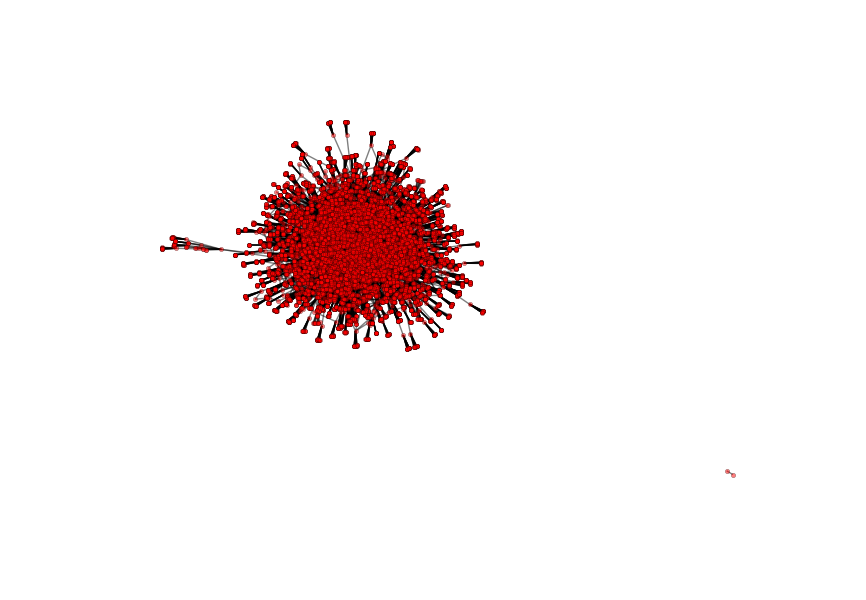

In [29]:
# Potential Influence Network
G = nx.from_numpy_matrix(adj_mat_followers)
nx.draw(G, alpha=.5, node_size=10, ed)
plt.show()
plt.savefig("chuck2_potential_influence_graph.pdf", dpi=1000)b

Well, that is useless!  Let's write it to GEFX and visualize it in Gephi...

In [30]:
nx.write_gexf(G, "potential_influence_chuck2.gexf")

In [44]:
from IPython.display import HTML
HTML('<iframe src=potential_influence_chuck2.png width=950 height=1000></iframe>')

This is a lot better.  Here are some descriptive statistics about the network graph above:
- Nodes: 10190
- Edges: 12011
- Network Diameter = 12
        - Network diameter is simply the shortest distance between the two most distant nodes in the network.
- Average Degree = 2.357
        - Average degree is the average number of edges connected to each node.
- Average Path Length = 6.795
        - Average path length is the average number of steps along the shortest paths for all possible pairs of network nodes. It is a measure of the efficiency of information or mass transport on a network.